# Info
Name:  

    ORACLES_AOD_summary_allyears

Purpose:  

    Prepare an analysis for comparing AOd from all ORACLES years
  
Input:

    none

Output:
   
    plots
  
Keywords:

    none
  
Dependencies:

    - numpy
    - matplotlib
    - scipy

  
Needed Files:

  - ...
    
History:

    Written: Samuel LeBlanc,Santa Cruz, CA, 2018-12-03
    

# Prepare python environment

In [2]:
%config InlineBackend.rc = {}
import matplotlib 
import os
matplotlib.rc_file(os.path.join(os.getcwd(),'file.rc'))
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np
import Sp_parameters as Sp
from load_utils import mat2py_time, toutc, load_ict
from Sp_parameters import smooth
from linfit import linfit
from path_utils import getpath
from plotting_utils import make_boxplot
import hdf5storage as hs
from plotting_utils import prelim
from datetime import datetime
from scipy.interpolate import UnivariateSpline
import matplotlib.dates as mdates
from mpl_toolkits.basemap import Basemap

In [3]:
%matplotlib notebook

In [4]:
fp =getpath('ORACLES')#'C:/Userds/sleblan2/Research/ORACLES/'
fp

u'/mnt/c/Users/sleblanc/Research/ORACLES/'

# Load files

## Load the 2016 data

In [5]:
ar6 = hs.loadmat(fp+'/aod_ict/v8/R3/all_aod_ict_R3_2016.mat')

In [410]:
ar6['flac'] = (ar6['qual_flag']==0)&(ar6['flag_acaod']==1)
ar6['flacr'] = (ar6['qual_flag']==0)&(ar6['flag_acaod']==1)&(ar6['fl_routine'])
ar6['flaco'] = (ar6['qual_flag']==0)&(ar6['flag_acaod']==1)&~(ar6['fl_routine'])

In [81]:
ar6['flr'] = (ar6['qual_flag']==0) & (ar6['fl_routine'])
ar6['flo'] = (ar6['qual_flag']==0) & ~(ar6['fl_routine'])
ar6['fl'] = (ar6['qual_flag']==0)

## Load the 2017 data

In [7]:
ar7 = hs.loadmat(fp+'/aod_ict_2017/R1/all_aod_ict_R1_2017.mat')

In [411]:
ar7['flac'] = (ar7['qual_flag']==0)&(ar7['flag_acaod']==1)
ar7['flacr'] = (ar7['qual_flag']==0)&(ar7['flag_acaod']==1)&(ar7['fl_routine'])
ar7['flaco'] = (ar7['qual_flag']==0)&(ar7['flag_acaod']==1)&~(ar7['fl_routine'])

In [80]:
ar7['flr'] = (ar7['qual_flag']==0) & (ar7['fl_routine'])
ar7['flo'] = (ar7['qual_flag']==0) & ~(ar7['fl_routine'])
ar7['fl'] = (ar7['qual_flag']==0)

## Load the 2018 data

In [9]:
ar8 = hs.loadmat(fp+'/aod_ict_2018/{vv}/all_aod_ict_{vv}_2018.mat'.format(vv='R0'))

In [412]:
ar8['flac'] = (ar8['qual_flag']==0) & (ar8['GPS_Alt']>600.0) & (ar8['GPS_Alt']<1800.0)  
ar8['flacr'] = (ar8['qual_flag']==0) & (ar8['GPS_Alt']>600.0) & (ar8['GPS_Alt']<1800.0)&(ar8['fl_routine']) 
ar8['flaco'] = (ar8['qual_flag']==0) & (ar8['GPS_Alt']>600.0) & (ar8['GPS_Alt']<1800.0)&~(ar8['fl_routine']) 

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less
  """Entry point for launching an IPython kernel.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in less
  
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in greater
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in less
  This is separate from the ipykernel package so we can avoid doing imports until


In [92]:
ar8['flr'] = (ar8['qual_flag']==0) & (ar8['fl_routine'])
ar8['flo'] = (ar8['qual_flag']==0) & (ar8['fl_routine']==False)
ar8['fl'] = (ar8['qual_flag']==0)

# Now plot the data together

In [11]:
len(ar6['AOD0501'][ar6['fl']]), len(ar7['AOD0501'][ar7['fl']]), len(ar8['AOD0501'][ar8['fl']])

(36604, 24595, 19453)

In [12]:
np.nanmean(ar6['AOD0501'][ar6['fl']]),np.nanmean(ar7['AOD0501'][ar7['fl']]),np.nanmean(ar8['AOD0501'][ar8['fl']])

(0.33449062943940555, 0.26594783492579793, 0.2833757261090834)

## plot the histograms

<IPython.core.display.Javascript object>


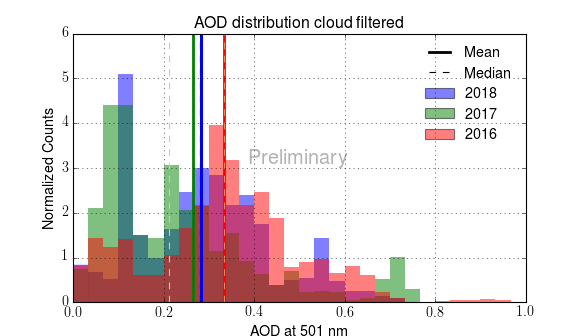

In [31]:
plt.figure()
plt.hist(ar8['AOD0501'][ar8['fl']],bins=30,range=(0,1.0),alpha=0.5,normed=True,edgecolor='None',color='b',label='2018')
plt.hist(ar7['AOD0501'][ar7['fl']],bins=30,range=(0,1.0),alpha=0.5,normed=True,edgecolor='None',color='g',label='2017')
plt.hist(ar6['AOD0501'][ar6['fl']],bins=30,range=(0,1.0),alpha=0.5,normed=True,edgecolor='None',color='r',label='2016')

#plt.hist(ar['AOD0501'][ar['fl1']],bins=30,range=(0,1.0),alpha=0.5,normed=False,edgecolor='None',color='b',label='below 600 m')
#plt.hist(ar['AOD0501'][ar['fl3']],bins=30,range=(0,1.0),alpha=0.5,normed=False,edgecolor='None',color='y',label='800-2200 m')
#plt.hist(ar['AOD0501'][ar['fl2']],bins=30,range=(0,1.0),alpha=0.5,normed=False,edgecolor='None',color='r',label='above 1800 m')
#plt.yscale('log')
plt.axvline(x=np.nanmean(ar8['AOD0501'][ar8['fl']]),ls='-',color='k',lw=2.5,label='Mean')
plt.axvline(x=np.nanmedian(ar8['AOD0501'][ar8['fl']]),ls='--',color='k',label='Median')
plt.axvline(x=np.nanmean(ar8['AOD0501'][ar8['fl']]),ls='-',color='b',lw=2.5)
plt.axvline(x=np.nanmedian(ar8['AOD0501'][ar8['fl']]),ls='--',color='b')

plt.axvline(x=np.nanmean(ar6['AOD0501'][ar6['fl']]),ls='-',color='r',lw=2.5)
plt.axvline(x=np.nanmedian(ar6['AOD0501'][ar6['fl']]),ls='--',color='coral')

plt.axvline(x=np.nanmean(ar7['AOD0501'][ar7['fl']]),ls='-',color='g',lw=2.5)
plt.axvline(x=np.nanmedian(ar7['AOD0501'][ar7['fl']]),ls='--',color='lightgreen')

plt.xlabel('AOD at 501 nm')
plt.ylabel('Normalized Counts')
plt.grid()
plt.title('AOD distribution cloud filtered')
prelim()
plt.legend(frameon=False)
plt.savefig(fp+'plot_all/AOD_normed_histogram_2018_2017_2016.png',dpi=600,transparent=True)

<IPython.core.display.Javascript object>


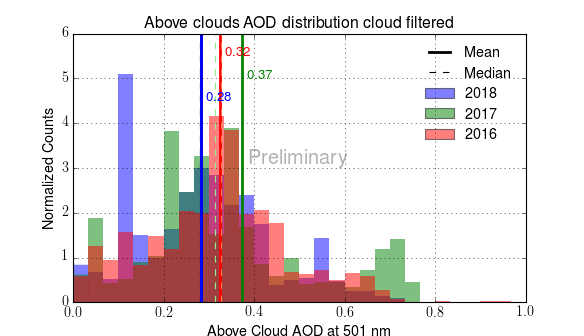

In [311]:
plt.figure()
plt.hist(ar8['AOD0501'][ar8['flac']],bins=30,range=(0,1.0),alpha=0.5,normed=True,edgecolor='None',color='b',label='2018')
plt.hist(ar7['AOD0501'][ar7['flac']],bins=30,range=(0,1.0),alpha=0.5,normed=True,edgecolor='None',color='g',label='2017')
plt.hist(ar6['AOD0501'][ar6['flac']],bins=30,range=(0,1.0),alpha=0.5,normed=True,edgecolor='None',color='r',label='2016')

#plt.hist(ar['AOD0501'][ar['fl1']],bins=30,range=(0,1.0),alpha=0.5,normed=False,edgecolor='None',color='b',label='below 600 m')
#plt.hist(ar['AOD0501'][ar['fl3']],bins=30,range=(0,1.0),alpha=0.5,normed=False,edgecolor='None',color='y',label='800-2200 m')
#plt.hist(ar['AOD0501'][ar['fl2']],bins=30,range=(0,1.0),alpha=0.5,normed=False,edgecolor='None',color='r',label='above 1800 m')
#plt.yscale('log')
plt.axvline(x=np.nanmean(ar8['AOD0501'][ar8['flac']]),ls='-',color='k',lw=2.5,label='Mean')
plt.axvline(x=np.nanmedian(ar8['AOD0501'][ar8['flac']]),ls='--',color='k',label='Median')
plt.axvline(x=np.nanmean(ar8['AOD0501'][ar8['flac']]),ls='-',color='b',lw=2.5)
plt.axvline(x=np.nanmedian(ar8['AOD0501'][ar8['flac']]),ls='--',color='b')

plt.axvline(x=np.nanmean(ar6['AOD0501'][ar6['flac']]),ls='-',color='r',lw=2.5)
plt.axvline(x=np.nanmedian(ar6['AOD0501'][ar6['flac']]),ls='--',color='coral')

plt.axvline(x=np.nanmean(ar7['AOD0501'][ar7['flac']]),ls='-',color='g',lw=2.5)
plt.axvline(x=np.nanmedian(ar7['AOD0501'][ar7['flac']]),ls='--',color='lightgreen')

plt.text(np.nanmean(ar6['AOD0501'][ar6['flac']])+0.01,5.5,'{:0.2f}'.format(np.nanmean(ar6['AOD0501'][ar6['flac']])),color='r')
plt.text(np.nanmean(ar7['AOD0501'][ar7['flac']])+0.01,5,'{:0.2f}'.format(np.nanmean(ar7['AOD0501'][ar7['flac']])),color='g')
plt.text(np.nanmean(ar8['AOD0501'][ar8['flac']])+0.01,4.5,'{:0.2f}'.format(np.nanmean(ar8['AOD0501'][ar8['flac']])),color='b')



plt.xlabel('Above Cloud AOD at 501 nm ')
plt.ylabel('Normalized Counts')
plt.grid()
plt.title('Above clouds AOD distribution cloud filtered')
prelim()
plt.legend(frameon=False)
plt.savefig(fp+'plot_all/AOD_Above_cloud_normed_histogram_2018_2017_2016.png',dpi=600,transparent=True)

<IPython.core.display.Javascript object>


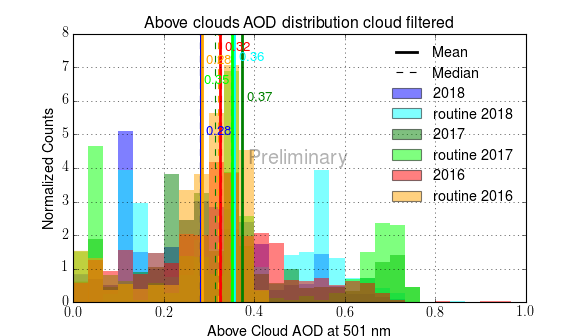

In [16]:
plt.figure()
plt.hist(ar8['AOD0501'][ar8['flac']],bins=30,range=(0,1.0),alpha=0.5,normed=True,edgecolor='None',color='b',label='2018')
plt.hist(ar8['AOD0501'][ar8['flacr']],bins=30,range=(0,1.0),alpha=0.5,
         normed=True,edgecolor='None',color='aqua',label='routine 2018')
plt.hist(ar7['AOD0501'][ar7['flac']],bins=30,range=(0,1.0),alpha=0.5,normed=True,edgecolor='None',color='g',label='2017')
plt.hist(ar7['AOD0501'][ar7['flacr']],bins=30,range=(0,1.0),alpha=0.5,
         normed=True,edgecolor='None',color='lime',label='routine 2017')
plt.hist(ar6['AOD0501'][ar6['flac']],bins=30,range=(0,1.0),alpha=0.5,normed=True,edgecolor='None',color='r',label='2016')
plt.hist(ar6['AOD0501'][ar6['flacr']],bins=30,range=(0,1.0),alpha=0.5,
         normed=True,edgecolor='None',color='orange',label='routine 2016')

plt.axvline(x=np.nanmean(ar8['AOD0501'][ar8['flac']]),ls='-',color='k',lw=2.5,label='Mean')
plt.axvline(x=np.nanmedian(ar8['AOD0501'][ar8['flac']]),ls='--',color='k',label='Median')
plt.axvline(x=np.nanmean(ar8['AOD0501'][ar8['flac']]),ls='-',color='b',lw=2.5)
plt.axvline(x=np.nanmedian(ar8['AOD0501'][ar8['flac']]),ls='--',color='b')
plt.axvline(x=np.nanmean(ar6['AOD0501'][ar6['flac']]),ls='-',color='r',lw=2.5)
plt.axvline(x=np.nanmedian(ar6['AOD0501'][ar6['flac']]),ls='--',color='r')
plt.axvline(x=np.nanmean(ar7['AOD0501'][ar7['flac']]),ls='-',color='g',lw=2.5)
plt.axvline(x=np.nanmedian(ar7['AOD0501'][ar7['flac']]),ls='--',color='g')
plt.axvline(x=np.nanmean(ar8['AOD0501'][ar8['flacr']]),ls='-',color='aqua',lw=2.5)
plt.axvline(x=np.nanmedian(ar8['AOD0501'][ar8['flacr']]),ls='--',color='aqua')
plt.axvline(x=np.nanmean(ar6['AOD0501'][ar6['flacr']]),ls='-',color='orange',lw=2.5)
plt.axvline(x=np.nanmedian(ar6['AOD0501'][ar6['flacr']]),ls='--',color='orange')
plt.axvline(x=np.nanmean(ar7['AOD0501'][ar7['flacr']]),ls='-',color='lime',lw=2.5)
plt.axvline(x=np.nanmedian(ar7['AOD0501'][ar7['flacr']]),ls='--',color='lime')

plt.text(np.nanmean(ar6['AOD0501'][ar6['flac']])+0.01,7.5,'{:0.2f}'.format(np.nanmean(ar6['AOD0501'][ar6['flac']])),color='r')
plt.text(np.nanmean(ar6['AOD0501'][ar6['flacr']])+0.01,7.1,'{:0.2f}'.format(np.nanmean(ar6['AOD0501'][ar6['flacr']])),color='orange')
plt.text(np.nanmean(ar7['AOD0501'][ar7['flac']])+0.01,6,'{:0.2f}'.format(np.nanmean(ar7['AOD0501'][ar7['flac']])),color='g')
plt.text(np.nanmean(ar7['AOD0501'][ar7['flacr']])-0.06,6.5,'{:0.2f}'.format(np.nanmean(ar7['AOD0501'][ar7['flacr']])),color='lime')
plt.text(np.nanmean(ar8['AOD0501'][ar8['flac']])+0.01,5,'{:0.2f}'.format(np.nanmean(ar8['AOD0501'][ar8['flac']])),color='b')
plt.text(np.nanmean(ar8['AOD0501'][ar8['flacr']])+0.01,7.2,'{:0.2f}'.format(np.nanmean(ar8['AOD0501'][ar8['flacr']])),color='aqua')


plt.xlabel('Above Cloud AOD at 501 nm ')
plt.ylabel('Normalized Counts')
plt.grid()
plt.title('Above clouds AOD distribution cloud filtered')
prelim()
plt.legend(frameon=False)
plt.savefig(fp+'plot_all/AOD_Above_cloud_normed_histogram_2018_2017_2016_withroutine.png',dpi=500,transparent=True)

## plot against lat and lon

In [17]:
lim = np.linspace(-15,7,12)
pos = np.array([(l+lim[i+1])/2.0 for i,l in enumerate(lim[0:-1])])

In [18]:
lima = np.linspace(-15,0,11)
posa = np.array([(l+lima[i+1])/2.0 for i,l in enumerate(lima[0:-1])])

In [22]:
lim2 = np.linspace(-15,15,16)
pos2 = np.array([(l+lim2[i+1])/2.0 for i,l in enumerate(lim2[0:-1])])

In [30]:
lim2a = np.linspace(-22,-7,13)
pos2a = np.array([(l+lim2a[i+1])/2.0 for i,l in enumerate(lim2a[0:-1])])

<IPython.core.display.Javascript object>


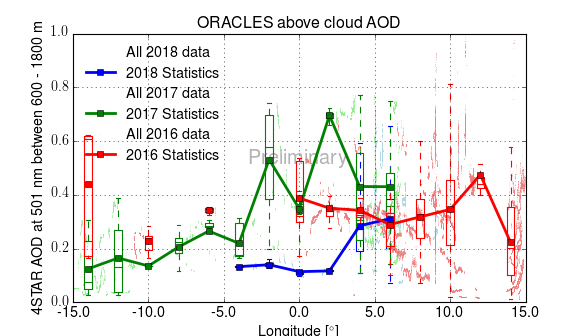

In [29]:
plt.figure()
plt.plot(ar8['Longitude'][ar8['flac']],ar8['AOD0501'][ar8['flac']],'.',color='lightblue',alpha=0.5,
         markersize=0.4,label='All 2018 data')
plt.xlim([-15,15])
make_boxplot(ar8['AOD0501'][ar8['flac']],ar8['Longitude'][ar8['flac']],lim,pos,color='b',label='2018 Statistics',fliers_off=True)


plt.plot(ar7['Longitude'][ar7['flac']],ar7['AOD0501'][ar7['flac']],'.',color='lightgreen',alpha=0.5,
         markersize=0.4,label='All 2017 data')
plt.xlim([-15,15])
make_boxplot(ar7['AOD0501'][ar7['flac']],ar7['Longitude'][ar7['flac']],lim,pos,color='g',label='2017 Statistics',fliers_off=True)
plt.plot(ar6['Longitude'][ar6['flac']],ar6['AOD0501'][ar6['flac']],'.',color='lightcoral',alpha=0.5,
         markersize=0.4,label='All 2016 data')
make_boxplot(ar6['AOD0501'][ar6['flac']],ar6['Longitude'][ar6['flac']],lim2,pos2,color='red',
             label='2016 Statistics',fliers_off=True)

plt.xlabel('Longitude [$^\\circ$]')
plt.ylabel('4STAR AOD at 501 nm between 600 - 1800 m')
plt.grid()
plt.xlim([-15,15])
plt.ylim([0,1])
plt.legend(frameon=False,numpoints=1,loc=2)
prelim()

plt.title('ORACLES above cloud AOD')
plt.savefig(fp+'plot_all/AOD_longitude_2016_2017_2018.png',dpi=600,transparent=True)

<IPython.core.display.Javascript object>


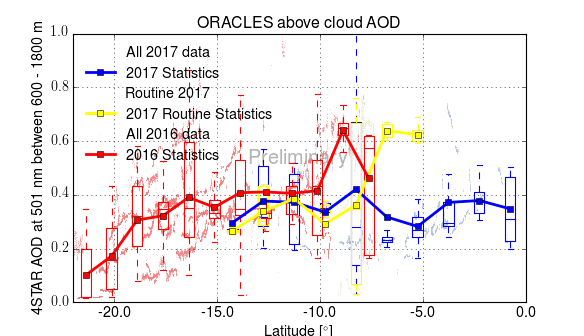

In [33]:
plt.figure()
plt.plot(ar7['Latitude'][ar7['flac']],ar7['AOD0501'][ar7['flac']],'.',color='lightsteelblue',alpha=0.5,
         markersize=0.4,label='All 2017 data')
plt.xlim([-22,0])
make_boxplot(ar7['AOD0501'][ar7['flac']],ar7['Latitude'][ar7['flac']],lima,posa,color='blue',label='2017 Statistics',fliers_off=True)
plt.plot(ar7['Latitude'][ar7['flacr']],ar7['AOD0501'][ar7['flacr']],'.',color='lightyellow',alpha=0.5,
         markersize=0.4,label='Routine 2017')
make_boxplot(ar7['AOD0501'][ar7['flacr']],ar7['Latitude'][ar7['flacr']],lima,posa,color='yellow',label='2017 Routine Statistics',
             fliers_off=True)

plt.plot(ar6['Latitude'][ar6['flac']],ar6['AOD0501'][ar6['flac']],'.',color='lightcoral',alpha=0.5,
         markersize=0.4,label='All 2016 data')
make_boxplot(ar6['AOD0501'][ar6['flac']],ar6['Latitude'][ar6['flac']],lim2a,pos2a,color='red',
             label='2016 Statistics',fliers_off=True)

plt.xlabel('Latitude [$^\\circ$]')
plt.ylabel('4STAR AOD at 501 nm between 600 - 1800 m')
plt.grid()
plt.xlim([-22,0])
plt.ylim(0,1)
plt.legend(frameon=False,numpoints=1,loc=2)
prelim()

plt.title('ORACLES above cloud AOD')
plt.savefig(fp+'plot_all/AOD_latitude_2016_2017.png',dpi=600,transparent=True)

<IPython.core.display.Javascript object>


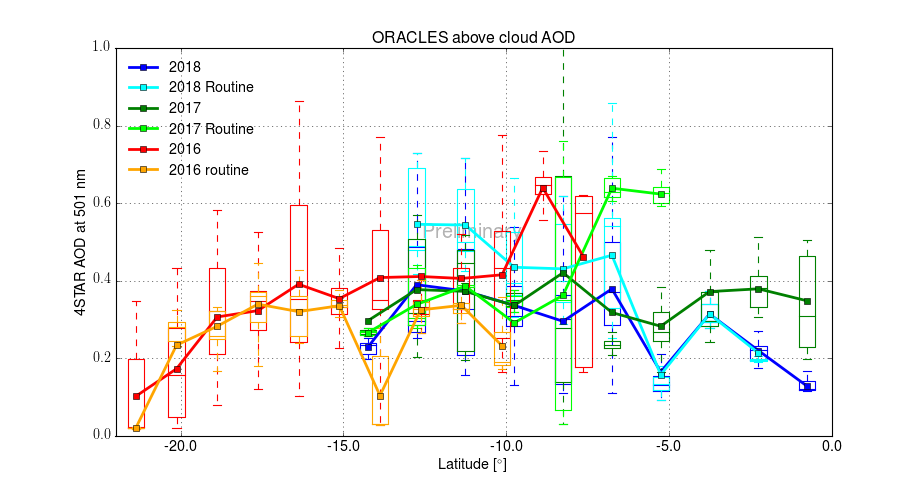

In [36]:
plt.figure()
plt.plot(ar8['Latitude'][ar8['flac']],ar8['AOD0501'][ar8['flac']],'.',color='lightsteelblue',alpha=0.0,
         markersize=0.4)
plt.xlim([-22,0])
make_boxplot(ar8['AOD0501'][ar8['flac']],ar8['Latitude'][ar8['flac']],lima,posa,color='b',label='2018',fliers_off=True)
#plt.plot(ar8['Latitude'][ar8['flacr']],ar8['AOD0501'][ar8['flacr']],'.',color='aqua',alpha=0.5,
#         markersize=0.4)
make_boxplot(ar8['AOD0501'][ar8['flacr']],ar8['Latitude'][ar8['flacr']],lima,posa,color='aqua',label='2018 Routine',
             fliers_off=True)

#plt.plot(ar7['Latitude'][ar7['flac']],ar7['AOD0501'][ar7['flac']],'.',color='g',alpha=0.5,
#         markersize=0.4)
make_boxplot(ar7['AOD0501'][ar7['flac']],ar7['Latitude'][ar7['flac']],lima,posa,color='g',label='2017',
             fliers_off=True)
#plt.plot(ar7['Latitude'][ar7['flacr']],ar7['AOD0501'][ar7['flacr']],'.',color='lime',alpha=0.5,
#         markersize=0.4)
make_boxplot(ar7['AOD0501'][ar7['flacr']],ar7['Latitude'][ar7['flacr']],lima,posa,color='lime',label='2017 Routine',
             fliers_off=True)

#plt.plot(ar6['Latitude'][ar6['flac']],ar6['AOD0501'][ar6['flac']],'.',color='lightcoral',alpha=0.5,
#         markersize=0.4)
make_boxplot(ar6['AOD0501'][ar6['flac']],ar6['Latitude'][ar6['flac']],lim2a,pos2a,color='red',
             label='2016',fliers_off=True)
#plt.plot(ar6['Latitude'][ar6['flacr']],ar6['AOD0501'][ar6['flacr']],'.',color='orange',alpha=0.5,
#         markersize=0.4)
make_boxplot(ar6['AOD0501'][ar6['flacr']],ar6['Latitude'][ar6['flacr']],lim2a,pos2a,color='orange',
             label='2016 routine',fliers_off=True)

plt.xlabel('Latitude [$^\\circ$]')
plt.ylabel('4STAR AOD at 501 nm')
plt.grid()
plt.xlim([-22,0])
plt.ylim(0,1)
plt.legend(frameon=False,numpoints=1,loc=2)
prelim()

plt.title('ORACLES above cloud AOD')
plt.savefig(fp+'plot_all/AOD_latitude_2016_2017_2018.png',dpi=600,transparent=True)

<IPython.core.display.Javascript object>


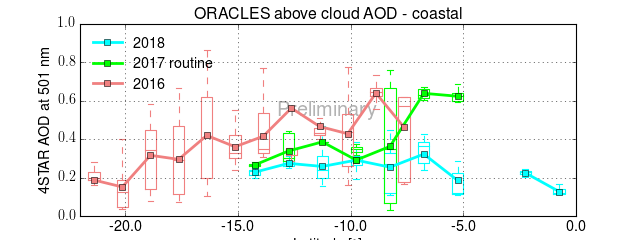

In [418]:
plt.figure(figsize=(8,3))
plt.plot(ar8['Latitude'][ar8['flaco']],ar8['AOD0501'][ar8['flaco']],'.',color='lightsteelblue',alpha=0.0,
         markersize=0.4)
plt.xlim([-22,0])
#make_boxplot(ar8['AOD0501'][ar8['flac']],ar8['Latitude'][ar8['flac']],lima,posa,color='b',label='2018',fliers_off=True)
#plt.plot(ar8['Latitude'][ar8['flacr']],ar8['AOD0501'][ar8['flacr']],'.',color='aqua',alpha=0.5,
#         markersize=0.4)
make_boxplot(ar8['AOD0501'][ar8['flaco']],ar8['Latitude'][ar8['flaco']],lima,posa,color='aqua',label='2018',
             fliers_off=True)

#plt.plot(ar7['Latitude'][ar7['flac']],ar7['AOD0501'][ar7['flac']],'.',color='g',alpha=0.5,
#         markersize=0.4)
#make_boxplot(ar7['AOD0501'][ar7['flac']],ar7['Latitude'][ar7['flac']],lima,posa,color='g',label='2017 coastal',
#             fliers_off=True)
#plt.plot(ar7['Latitude'][ar7['flacr']],ar7['AOD0501'][ar7['flacr']],'.',color='lime',alpha=0.5,
#         markersize=0.4)
make_boxplot(ar7['AOD0501'][ar7['flacr']],ar7['Latitude'][ar7['flacr']],lima,posa,color='lime',label='2017 routine',
             fliers_off=True)

#plt.plot(ar6['Latitude'][ar6['flac']],ar6['AOD0501'][ar6['flac']],'.',color='lightcoral',alpha=0.5,
#         markersize=0.4)
make_boxplot(ar6['AOD0501'][ar6['flaco']],ar6['Latitude'][ar6['flaco']],lim2a,pos2a,color='lightcoral',
             label='2016',fliers_off=True)
#plt.plot(ar6['Latitude'][ar6['flacr']],ar6['AOD0501'][ar6['flacr']],'.',color='orange',alpha=0.5,
#         markersize=0.4)
#make_boxplot(ar6['AOD0501'][ar6['flacr']],ar6['Latitude'][ar6['flacr']],lim2a,pos2a,color='orange',
#             label='2016 routine',fliers_off=True)

plt.xlabel('Latitude [$^\\circ$]')
plt.ylabel('4STAR AOD at 501 nm')
plt.grid()
plt.xlim([-22,0])
plt.ylim(0,1)
plt.legend(frameon=False,numpoints=1,loc=2)
prelim()

plt.title('ORACLES above cloud AOD - coastal')
plt.savefig(fp+'plot_all/AOD_coastal_latitude_2016_2017_2018.png',dpi=600,transparent=True)

In [ ]:
plt.figure(figsize=(8,3))
plt.plot(ar8['Latitude'][ar8['flac']],ar8['AOD0501'][ar8['flac']],'.',color='lightsteelblue',alpha=0.0,
         markersize=0.4)
plt.xlim([-22,0])
make_boxplot(ar8['AOD0501'][ar8['flacr']],ar8['Latitude'][ar8['flacr']],lima,posa,color='b',label='2018 routine',fliers_off=True)
#plt.plot(ar8['Latitude'][ar8['flacr']],ar8['AOD0501'][ar8['flacr']],'.',color='aqua',alpha=0.5,
#         markersize=0.4)
#make_boxplot(ar8['AOD0501'][ar8['flacr']],ar8['Latitude'][ar8['flacr']],lima,posa,color='aqua',label='2018',
#             fliers_off=True)

#plt.plot(ar7['Latitude'][ar7['flac']],ar7['AOD0501'][ar7['flac']],'.',color='g',alpha=0.5,
#         markersize=0.4)
make_boxplot(ar7['AOD0501'][ar7['flaco']],ar7['Latitude'][ar7['flaco']],lima,posa,color='g',label='2017',
             fliers_off=True)
#plt.plot(ar7['Latitude'][ar7['flacr']],ar7['AOD0501'][ar7['flacr']],'.',color='lime',alpha=0.5,
#         markersize=0.4)
#make_boxplot(ar7['AOD0501'][ar7['flacr']],ar7['Latitude'][ar7['flacr']],lima,posa,color='lime',label='2017',
#             fliers_off=True)

#plt.plot(ar6['Latitude'][ar6['flac']],ar6['AOD0501'][ar6['flac']],'.',color='lightcoral',alpha=0.5,
#         markersize=0.4)
#make_boxplot(ar6['AOD0501'][ar6['flac']],ar6['Latitude'][ar6['flac']],lim2a,pos2a,color='red',
#             label='2016',fliers_off=True)
#plt.plot(ar6['Latitude'][ar6['flacr']],ar6['AOD0501'][ar6['flacr']],'.',color='orange',alpha=0.5,
#         markersize=0.4)
make_boxplot(ar6['AOD0501'][ar6['flacr']],ar6['Latitude'][ar6['flacr']],lim2a,pos2a,color='red',
             label='2016 routine',fliers_off=True)

plt.xlabel('Latitude [$^\\circ$]')
plt.ylabel('4STAR AOD at 501 nm')
plt.grid()
plt.xlim([-22,0])
plt.ylim(0,1)
plt.legend(frameon=False,numpoints=1,loc=2)
prelim()

plt.title('ORACLES above cloud AOD - oceanic')
plt.savefig(fp+'plot_all/AOD_oceanc_latitude_2016_2017_2018.png',dpi=600,transparent=True)

# Plot some angstrom exponents

## Setup the vertical angtrom profiles

In [49]:
ar6['fl_QA_angs'] = ar6['fl_QA'] & (ar6['AOD0501']>0.1)
ar6['fl_QA_angs_aca'] = ar6['flac'] & (ar6['AOD0501']>0.1) & (ar6['GPS_Alt']>300.0)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  


In [50]:
ar7['fl_QA_angs'] = ar7['fl_QA'] & (ar7['AOD0501']>0.1)
ar7['fl_QA_angs_aca'] = ar7['flac'] & (ar7['AOD0501']>0.1) & (ar7['GPS_Alt']>300.0)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  


In [51]:
ar8['fl_QA_angs'] = ar8['fl_QA'] & (ar8['AOD0501']>0.1)
ar8['fl_QA_angs_aca'] = ar8['flac'] & (ar8['AOD0501']>0.1) & (ar8['GPS_Alt']>300.0)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  


In [43]:
def make_bined_alt(x,alt,days,fl,n=70):
    binned_ang,binned_alt,binned_num,binned_ndays = [],[],[],[]
    for i in xrange(70):
        flaa = (alt[fl]>=i*100.0) & (alt[fl]<(i+1.0)*100.0)
        binned_ang.append(x[fl][flaa])
        binned_alt.append(np.mean([i*100.0,(i+1.0)*100.0]))
        binned_num.append(len(x[fl][flaa]))
        binned_ndays.append(len(np.unique(days[fl][flaa])))
    return binned_ang,binned_alt,binned_num,binned_ndays

In [56]:
def set_box_whisker_color(cl,bp,binned_ndays):
    bndm = np.nanmax(binned_ndays)*1.0
    for j,b in enumerate(bp['boxes']):
        b.set_facecolor(cl(binned_ndays[j]*1.0/bndm))
        b.set_edgecolor(cl(binned_ndays[j]*1.0/bndm))
        #b.set_alpha(0.4)
    for j,b in enumerate(bp['means']):
        b.set_marker('.')
        b.set_color('None')
        b.set_markerfacecolor('darkgreen')
        b.set_markeredgecolor('darkgreen')
        b.set_alpha(0.6)
    for j,b in enumerate(bp['whiskers']):
        b.set_linestyle('-')
        b.set_color('pink') #gr(binned_ndays[j]*1.0/bndm))
        b.set_alpha(0.7)
    for j,b in enumerate(bp['caps']):
        b.set_alpha(0.7)
        b.set_color('pink')#gr(binned_ndays[j]*1.0/bndm))
    for j,b in enumerate( bp['medians']):
        b.set_linewidth(4)
        b.set_color('gold')
        b.set_alpha(0.4)
    
    return

In [54]:
binned_ang6,binned_alt6,binned_num6,binned_ndays6 = make_bined_alt(ar6['AOD_angstrom_470_865'],
                                                                   ar6['GPS_Alt'],ar6['days'],ar6['fl_QA_angs'])
binned_ang7,binned_alt7,binned_num7,binned_ndays7 = make_bined_alt(ar7['AOD_angstrom_470_865'],
                                                                   ar7['GPS_Alt'],ar7['days'],ar7['fl_QA_angs'])
binned_ang8,binned_alt8,binned_num8,binned_ndays8 = make_bined_alt(ar8['AOD_angstrom_470_865'],
                                                                   ar8['GPS_Alt'],ar8['days'],ar8['fl_QA_angs'])
binned_angc6,binned_altc6,binned_numc6,binned_ndaysc6 = make_bined_alt(ar6['AOD_angstrom_470_865'],
                                                                   ar6['GPS_Alt'],ar6['days'],ar6['fl_QA_angs_aca'])
binned_angc7,binned_altc7,binned_numc7,binned_ndaysc7 = make_bined_alt(ar7['AOD_angstrom_470_865'],
                                                                   ar7['GPS_Alt'],ar7['days'],ar7['fl_QA_angs_aca'])
binned_angc8,binned_altc8,binned_numc8,binned_ndaysc8 = make_bined_alt(ar8['AOD_angstrom_470_865'],
                                                                   ar8['GPS_Alt'],ar8['days'],ar8['fl_QA_angs_aca'])

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in greater_equal
  after removing the cwd from sys.path.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in less
  after removing the cwd from sys.path.


## Plot some profiles

<IPython.core.display.Javascript object>


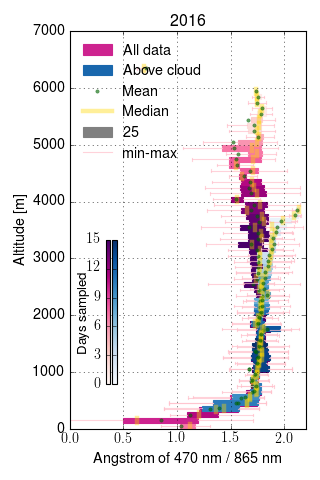

In [369]:
plt.figure(figsize=(4,6))
bp =plt.boxplot(binned_ang6,positions=np.array(binned_alt6)-5.0,vert=False,
                showfliers=False,widths=90,showmeans=True,patch_artist=True)
plt.xlabel('Angstrom of 470 nm / 865 nm')
plt.ylabel('Altitude [m]')
gr = plt.cm.RdPu
bl = plt.cm.Blues
set_box_whisker_color(gr,bp,binned_ndays6)
    
bpc =plt.boxplot(binned_angc6,positions=np.array(binned_altc6)+10.0,vert=False,
                 showfliers=False,widths=90,showmeans=True,patch_artist=True)
set_box_whisker_color(bl,bpc,binned_ndaysc6)
bpc['boxes'][0].set_color('grey')

ax = plt.gca()
plt.title('2016')
plt.ylim(0,7000)
plt.yticks([0,1000,2000,3000,4000,5000,6000,7000])
ax.set_yticklabels([0,1000,2000,3000,4000,5000,6000,7000])
plt.xlim(0,2.2)
plt.grid()
plt.legend([bp['boxes'][5],bpc['boxes'][18],bpc['means'][0],bpc['medians'][0],bpc['boxes'][0],bpc['whiskers'][0]],
           ['All data','Above cloud','Mean','Median','25% - 75%','min-max'],
           frameon=False,loc=2,numpoints=1)

scalarmapgr = plt.cm.ScalarMappable(cmap=gr)
scalarmapgr.set_array(binned_ndays6)
scalarmapbl = plt.cm.ScalarMappable(cmap=bl)
scalarmapbl.set_array(binned_ndays6)
cbaxesgr = plt.gcf().add_axes([0.33, 0.2, 0.015, 0.3])
cbg = plt.colorbar(scalarmapgr,cax=cbaxesgr)
cbaxesbl = plt.gcf().add_axes([0.35, 0.2, 0.015, 0.3])
cbb = plt.colorbar(scalarmapbl,cax=cbaxesbl)
cbg.set_ticks([0,3,6,9,12,15])
cbb.set_ticks([0,3,6,9,12,15]),cbb.set_ticklabels(['','','','',''])
cbaxesgr.yaxis.set_ticks_position('left'),cbaxesbl.yaxis.set_ticks_position('left')
cbaxesgr.text(-6.0,0.5,'Days sampled',rotation=90,verticalalignment='center')

plt.tight_layout()

plt.savefig(fp+'plot_all/ORACLES2016_4STAR_Angstrom_2wvl_vertical_cb.png',
            transparent=True,dpi=500)

<IPython.core.display.Javascript object>


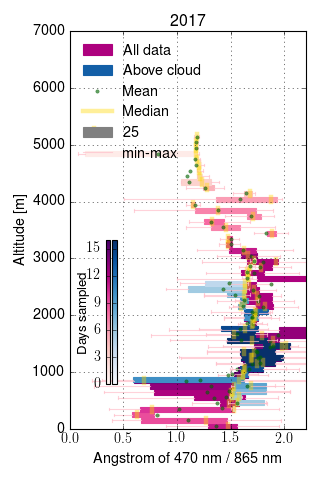

In [370]:
plt.figure(figsize=(4,6))
bp =plt.boxplot(binned_ang7,positions=np.array(binned_alt7)-5.0,vert=False,
                showfliers=False,widths=90,showmeans=True,patch_artist=True)
plt.xlabel('Angstrom of 470 nm / 865 nm')
plt.ylabel('Altitude [m]')
gr = plt.cm.RdPu
bl = plt.cm.Blues
set_box_whisker_color(gr,bp,binned_ndays7)
    
bpc =plt.boxplot(binned_angc7,positions=np.array(binned_altc7)+10.0,vert=False,
                 showfliers=False,widths=90,showmeans=True,patch_artist=True)
set_box_whisker_color(bl,bpc,binned_ndaysc7)
bpc['boxes'][0].set_color('grey')

ax = plt.gca()
plt.title('2017')
plt.ylim(0,7000)
plt.yticks([0,1000,2000,3000,4000,5000,6000,7000])
ax.set_yticklabels([0,1000,2000,3000,4000,5000,6000,7000])
plt.xlim(0,2.2)
plt.grid()
plt.legend([bp['boxes'][5],bpc['boxes'][18],bpc['means'][0],bpc['medians'][0],bpc['boxes'][0],bpc['whiskers'][0]],
           ['All data','Above cloud','Mean','Median','25% - 75%','min-max'],
           frameon=False,loc=2,numpoints=1)

scalarmapgr = plt.cm.ScalarMappable(cmap=gr)
scalarmapgr.set_array(binned_ndays7)
scalarmapbl = plt.cm.ScalarMappable(cmap=bl)
scalarmapbl.set_array(binned_ndays7)
cbaxesgr = plt.gcf().add_axes([0.33, 0.2, 0.015, 0.3])
cbg = plt.colorbar(scalarmapgr,cax=cbaxesgr)
cbaxesbl = plt.gcf().add_axes([0.35, 0.2, 0.015, 0.3])
cbb = plt.colorbar(scalarmapbl,cax=cbaxesbl)
cbg.set_ticks([0,3,6,9,12,15])
cbb.set_ticks([0,3,6,9,12,15]),cbb.set_ticklabels(['','','','',''])
cbaxesgr.yaxis.set_ticks_position('left'),cbaxesbl.yaxis.set_ticks_position('left')
cbaxesgr.text(-6.0,0.5,'Days sampled',rotation=90,verticalalignment='center')

plt.tight_layout()

plt.savefig(fp+'plot_all/ORACLES2017_4STAR_Angstrom_2wvl_vertical_cb.png',
            transparent=True,dpi=500)

<IPython.core.display.Javascript object>


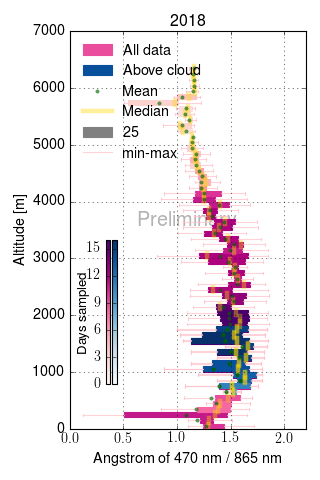

In [388]:
plt.figure(figsize=(4,6))
bp =plt.boxplot(binned_ang8,positions=np.array(binned_alt8)-5.0,vert=False,
                showfliers=False,widths=90,showmeans=True,patch_artist=True)
plt.xlabel('Angstrom of 470 nm / 865 nm')
plt.ylabel('Altitude [m]')
gr = plt.cm.RdPu
bl = plt.cm.Blues
set_box_whisker_color(gr,bp,binned_ndays8)
    
bpc =plt.boxplot(binned_angc8,positions=np.array(binned_altc8)+10.0,vert=False,
                 showfliers=False,widths=90,showmeans=True,patch_artist=True)
set_box_whisker_color(bl,bpc,binned_ndaysc8)
bpc['boxes'][0].set_color('grey')

ax = plt.gca()
plt.title('2018')
plt.ylim(0,7000)
plt.yticks([0,1000,2000,3000,4000,5000,6000,7000])
ax.set_yticklabels([0,1000,2000,3000,4000,5000,6000,7000])
plt.xlim(0,2.2)
plt.grid()
plt.legend([bp['boxes'][5],bpc['boxes'][10],bpc['means'][0],bpc['medians'][0],bpc['boxes'][0],bpc['whiskers'][0]],
           ['All data','Above cloud','Mean','Median','25% - 75%','min-max'],
           frameon=False,loc=2,numpoints=1)
prelim()
scalarmapgr = plt.cm.ScalarMappable(cmap=gr)
scalarmapgr.set_array(binned_ndays8)
scalarmapbl = plt.cm.ScalarMappable(cmap=bl)
scalarmapbl.set_array(binned_ndays8)
cbaxesgr = plt.gcf().add_axes([0.33, 0.2, 0.015, 0.3])
cbg = plt.colorbar(scalarmapgr,cax=cbaxesgr)
cbaxesbl = plt.gcf().add_axes([0.35, 0.2, 0.015, 0.3])
cbb = plt.colorbar(scalarmapbl,cax=cbaxesbl)
cbg.set_ticks([0,3,6,9,12,15])
cbb.set_ticks([0,3,6,9,12,15]),cbb.set_ticklabels(['','','','',''])
cbaxesgr.yaxis.set_ticks_position('left'),cbaxesbl.yaxis.set_ticks_position('left')
cbaxesgr.text(-6.0,0.5,'Days sampled',rotation=90,verticalalignment='center')

plt.tight_layout()

plt.savefig(fp+'plot_all/ORACLES2018_4STAR_Angstrom_2wvl_vertical_cb.png',
            transparent=True,dpi=500)

# Plot some AOD profiles

## Prepare the AOD profiles

In [87]:
binned_aod6,binned_alta6,binned_numa6,binned_ndaysa6 = make_bined_alt(ar6['AOD0501'],
                                                                   ar6['GPS_Alt'],ar6['days'],ar6['flo'])
binned_aod7,binned_alta7,binned_numa7,binned_ndaysa7 = make_bined_alt(ar7['AOD0501'],
                                                                   ar7['GPS_Alt'],ar7['days'],ar7['flo'])
binned_aod8,binned_alta8,binned_numa8,binned_ndaysa8 = make_bined_alt(ar8['AOD0501'],
                                                                   ar8['GPS_Alt'],ar8['days'],ar8['flo'])
binned_aodr6,binned_altar6,binned_numar6,binned_ndaysar6 = make_bined_alt(ar6['AOD0501'],
                                                                   ar6['GPS_Alt'],ar6['days'],ar6['flr'])
binned_aodr7,binned_altar7,binned_numar7,binned_ndaysar7 = make_bined_alt(ar7['AOD0501'],
                                                                   ar7['GPS_Alt'],ar7['days'],ar7['flr'])
binned_aodr8,binned_altar8,binned_numar8,binned_ndaysar8 = make_bined_alt(ar8['AOD0501'],
                                                                   ar8['GPS_Alt'],ar8['days'],ar8['flr'])

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in greater_equal
  after removing the cwd from sys.path.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in less
  after removing the cwd from sys.path.


## Plot the profiles

<IPython.core.display.Javascript object>


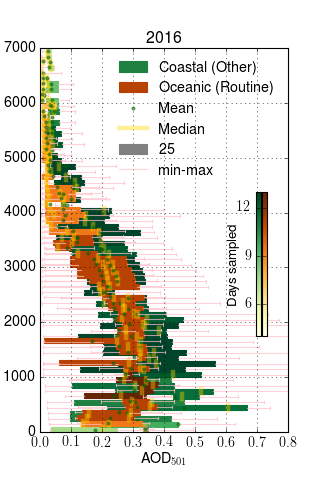

In [385]:
plt.figure(figsize=(4,6))
bp =plt.boxplot(binned_aod6,positions=np.array(binned_alta6)-5.0,vert=False,
                showfliers=False,widths=90,showmeans=True,patch_artist=True)
plt.xlabel('AOD_{{501}}')
plt.ylabel('Altitude [m]')
gr = plt.cm.YlGn
bl = plt.cm.YlOrBr
set_box_whisker_color(gr,bp,binned_ndaysa6)
    
bpc =plt.boxplot(binned_aodr6,positions=np.array(binned_altar6)+10.0,vert=False,
                 showfliers=False,widths=90,showmeans=True,patch_artist=True)
set_box_whisker_color(bl,bpc,binned_ndaysar6)
bpc['boxes'][0].set_color('grey')

ax = plt.gca()
plt.title('2016')
plt.ylim(0,7000)
plt.yticks([0,1000,2000,3000,4000,5000,6000,7000])
ax.set_yticklabels([0,1000,2000,3000,4000,5000,6000,7000])
plt.xlim(0,0.8)
plt.grid()
plt.legend([bp['boxes'][5],bpc['boxes'][18],bpc['means'][0],bpc['medians'][0],bpc['boxes'][0],bpc['whiskers'][0]],
           ['Coastal (Other)','Oceanic (Routine)','Mean','Median','25% - 75%','min-max'],
           frameon=False,numpoints=1)

scalarmapgr = plt.cm.ScalarMappable(cmap=gr)
scalarmapgr.set_array(binned_ndaysa6)
scalarmapbl = plt.cm.ScalarMappable(cmap=bl)
scalarmapbl.set_array(binned_ndaysa6)
cbaxesgr = plt.gcf().add_axes([0.8, 0.3, 0.015, 0.3])
cbg = plt.colorbar(scalarmapgr,cax=cbaxesgr)
cbaxesbl = plt.gcf().add_axes([0.82, 0.3, 0.015, 0.3])
cbb = plt.colorbar(scalarmapbl,cax=cbaxesbl)
cbg.set_ticks([0,3,6,9,12,15])
cbb.set_ticks([0,3,6,9,12,15]),cbb.set_ticklabels(['','','','',''])
cbaxesgr.yaxis.set_ticks_position('left'),cbaxesbl.yaxis.set_ticks_position('left')
cbaxesgr.text(-6.0,0.5,'Days sampled',rotation=90,verticalalignment='center')

#plt.tight_layout()

plt.savefig(fp+'plot_all/ORACLES2016_4STAR_AOD_vertical_cb.png',
            transparent=True,dpi=500)

<IPython.core.display.Javascript object>


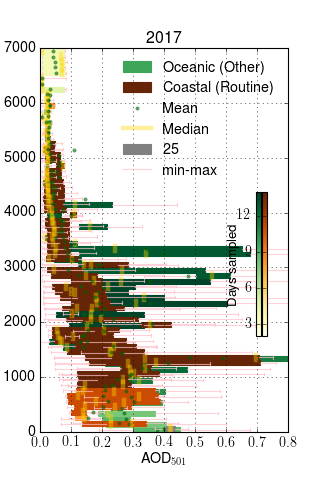

In [386]:
plt.figure(figsize=(4,6))
bp =plt.boxplot(binned_aod7,positions=np.array(binned_alta7)-5.0,vert=False,
                showfliers=False,widths=90,showmeans=True,patch_artist=True)
plt.xlabel('AOD_{{501}}')
plt.ylabel('Altitude [m]')
gr = plt.cm.YlGn
bl = plt.cm.YlOrBr
set_box_whisker_color(gr,bp,binned_ndaysa7)
    
bpc =plt.boxplot(binned_aodr7,positions=np.array(binned_altar7)+10.0,vert=False,
                 showfliers=False,widths=90,showmeans=True,patch_artist=True)
set_box_whisker_color(bl,bpc,binned_ndaysar7)
bpc['boxes'][0].set_color('grey')

ax = plt.gca()
plt.title('2017')
plt.ylim(0,7000)
plt.yticks([0,1000,2000,3000,4000,5000,6000,7000])
ax.set_yticklabels([0,1000,2000,3000,4000,5000,6000,7000])
plt.xlim(0,0.8)
plt.grid()
plt.legend([bp['boxes'][5],bpc['boxes'][18],bpc['means'][0],bpc['medians'][0],bpc['boxes'][0],bpc['whiskers'][0]],
           ['Oceanic (Other)','Coastal (Routine)','Mean','Median','25% - 75%','min-max'],
           frameon=False,numpoints=1)

scalarmapgr = plt.cm.ScalarMappable(cmap=gr)
scalarmapgr.set_array(binned_ndaysa7)
scalarmapbl = plt.cm.ScalarMappable(cmap=bl)
scalarmapbl.set_array(binned_ndaysa7)
cbaxesgr = plt.gcf().add_axes([0.8, 0.3, 0.015, 0.3])
cbg = plt.colorbar(scalarmapgr,cax=cbaxesgr)
cbaxesbl = plt.gcf().add_axes([0.82, 0.3, 0.015, 0.3])
cbb = plt.colorbar(scalarmapbl,cax=cbaxesbl)
cbg.set_ticks([0,3,6,9,12,15])
cbb.set_ticks([0,3,6,9,12,15]),cbb.set_ticklabels(['','','','',''])
cbaxesgr.yaxis.set_ticks_position('left'),cbaxesbl.yaxis.set_ticks_position('left')
cbaxesgr.text(-6.0,0.5,'Days sampled',rotation=90,verticalalignment='center')

#plt.tight_layout()

plt.savefig(fp+'plot_all/ORACLES2017_4STAR_AOD_vertical_cb.png',
            transparent=True,dpi=500)

<IPython.core.display.Javascript object>


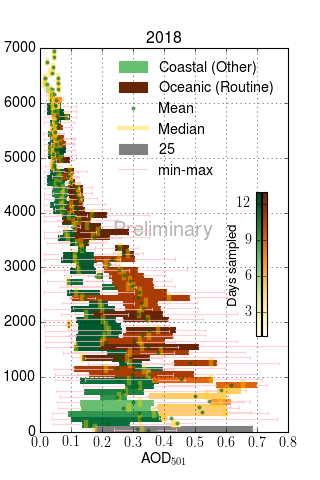

In [389]:
plt.figure(figsize=(4,6))
bp =plt.boxplot(binned_aod8,positions=np.array(binned_alta8)-5.0,vert=False,
                showfliers=False,widths=90,showmeans=True,patch_artist=True)
plt.xlabel('AOD_{{501}}')
plt.ylabel('Altitude [m]')
gr = plt.cm.YlGn
bl = plt.cm.YlOrBr
set_box_whisker_color(gr,bp,binned_ndaysa8)
    
bpc =plt.boxplot(binned_aodr8,positions=np.array(binned_altar8)+10.0,vert=False,
                 showfliers=False,widths=90,showmeans=True,patch_artist=True)
set_box_whisker_color(bl,bpc,binned_ndaysar8)
bpc['boxes'][0].set_color('grey')

ax = plt.gca()
plt.title('2018')
plt.ylim(0,7000)
plt.yticks([0,1000,2000,3000,4000,5000,6000,7000])
ax.set_yticklabels([0,1000,2000,3000,4000,5000,6000,7000])
plt.xlim(0,0.8)
plt.grid()
plt.legend([bp['boxes'][5],bpc['boxes'][18],bpc['means'][0],bpc['medians'][0],bpc['boxes'][0],bpc['whiskers'][0]],
           ['Coastal (Other)','Oceanic (Routine)','Mean','Median','25% - 75%','min-max'],
           frameon=False,numpoints=1)
prelim()
scalarmapgr = plt.cm.ScalarMappable(cmap=gr)
scalarmapgr.set_array(binned_ndaysa8)
scalarmapbl = plt.cm.ScalarMappable(cmap=bl)
scalarmapbl.set_array(binned_ndaysa8)
cbaxesgr = plt.gcf().add_axes([0.8, 0.3, 0.015, 0.3])
cbg = plt.colorbar(scalarmapgr,cax=cbaxesgr)
cbaxesbl = plt.gcf().add_axes([0.82, 0.3, 0.015, 0.3])
cbb = plt.colorbar(scalarmapbl,cax=cbaxesbl)
cbg.set_ticks([0,3,6,9,12,15])
cbb.set_ticks([0,3,6,9,12,15]),cbb.set_ticklabels(['','','','',''])
cbaxesgr.yaxis.set_ticks_position('left'),cbaxesbl.yaxis.set_ticks_position('left')
cbaxesgr.text(-6.0,0.5,'Days sampled',rotation=90,verticalalignment='center')

#plt.tight_layout()

plt.savefig(fp+'plot_all/ORACLES2018_4STAR_AOD_vertical_cb.png',
            transparent=True,dpi=500)

# Plot a 3 year time series for a region

## Set the region and times

In [94]:
lat1,lat2 = -17.0,-10.0
lon1,lon2 = 3.5,6.75

In [180]:
ar6['flq'] = ar6['flac'] & (ar6['Latitude']>lat1) & (ar6['Latitude']<lat2) & (ar6['Longitude']>lon1) & (ar6['Longitude']<lon2) & (ar6['qual_flag']==0)& (ar6['AOD0501']<1.5)
ar7['flq'] = ar7['flac'] & (ar7['Latitude']>lat1) & (ar7['Latitude']<lat2) & (ar7['Longitude']>lon1) & (ar7['Longitude']<lon2) & (ar7['qual_flag']==0)& (ar7['AOD0501']<1.5)
ar8['flq'] = ar8['flac'] & (ar8['Latitude']>lat1) & (ar8['Latitude']<lat2) & (ar8['Longitude']>lon1) & (ar8['Longitude']<lon2) & (ar8['qual_flag']==0)& (ar8['AOD0501']<1.5)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less
  """Entry point for launching an IPython kernel.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in less
  
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in greater
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in less
  This is separate from the ipykernel package so we can avoid doing imports until


In [115]:
days6 = ['20160824','20160825','20160827','20160830','20160831','20160902','20160904','20160906','20160908',
       '20160910','20160912','20160914','20160918','20160920','20160924','20160925','20160927','20160930']
days7 = ['20170801','20170802','20170807','20170809', '20170812','20170813','20170815','20170817','20170818','20170819','20170821',
        '20170824','20170826','20170828','20170830','20170831','20170902','20170903','20170904']
days8 = ['20180921','20180922','20180924','20180927','20180930','20181002','20181003','20181005','20181007','20181010','20181012',
        '20181015','20181017','20181019','20181021','20181023','20181025','20181026','20181027']

In [116]:
ar6['daysd'] = [days6[i] for i in ar6['days'].astype(int)]
ar7['daysd'] = [days7[i] for i in ar7['days'].astype(int)]
ar8['daysd'] = [days8[i] for i in ar8['days'].astype(int)]

In [135]:
ar6['ndtime'] = [datetime(int(d[0:4]),int(d[4:6]),int(d[6:8]),int(ar6['Start_UTC'][i]),
                          int((ar6['Start_UTC'][i]-float(int(ar6['Start_UTC'][i])))*60)) for i,d in enumerate(ar6['daysd'])]
ar7['ndtime'] = [datetime(int(d[0:4]),int(d[4:6]),int(d[6:8]),int(ar7['Start_UTC'][i]),
                          int((ar7['Start_UTC'][i]-float(int(ar7['Start_UTC'][i])))*60)) for i,d in enumerate(ar7['daysd'])]
ar8['ndtime'] = [datetime(int(d[0:4]),int(d[4:6]),int(d[6:8]),int(ar8['Start_UTC'][i]),
                          int((ar8['Start_UTC'][i]-float(int(ar8['Start_UTC'][i])))*60)) for i,d in enumerate(ar8['daysd'])]

In [143]:
ar6['ndtimes'] = np.array(ar6['ndtime'])
ar7['ndtimes'] = np.array(ar7['ndtime'])
ar8['ndtimes'] = np.array(ar8['ndtime'])

In [151]:
ar6['ndtime2'] = np.array([datetime(2018,int(d[4:6]),int(d[6:8]),int(ar6['Start_UTC'][i]),
                          int((ar6['Start_UTC'][i]-float(int(ar6['Start_UTC'][i])))*60)) for i,d in enumerate(ar6['daysd'])])
ar7['ndtime2'] = np.array([datetime(2018,int(d[4:6]),int(d[6:8]),int(ar7['Start_UTC'][i]),
                          int((ar7['Start_UTC'][i]-float(int(ar7['Start_UTC'][i])))*60)) for i,d in enumerate(ar7['daysd'])])
ar8['ndtime2'] = np.array([datetime(2018,int(d[4:6]),int(d[6:8]),int(ar8['Start_UTC'][i]),
                          int((ar8['Start_UTC'][i]-float(int(ar8['Start_UTC'][i])))*60)) for i,d in enumerate(ar8['daysd'])])

## Plot the time series of the region

In [181]:
bin_aod6,bin_doy6,bin_num6 = [],[],[]
bin_days6 = np.unique(ar6['days'][ar6['flq']])
for d in bin_days6:
    flh = (ar6['days'][ar6['flq']]==d)
    bin_doy6.append(ar6['ndtime2'][ar6['flq']][flh][0].timetuple().tm_yday)
    bin_aod6.append(ar6['AOD0501'][ar6['flq']][flh])
    bin_num6.append(len(ar6['AOD0501'][ar6['flq']][flh]))

In [182]:
bin_aod7,bin_doy7,bin_num7 = [],[],[]
bin_days7 = np.unique(ar7['days'][ar7['flq']])
for d in bin_days7:
    flh = (ar7['days'][ar7['flq']]==d)
    bin_doy7.append(ar7['ndtime2'][ar7['flq']][flh][0].timetuple().tm_yday)
    bin_aod7.append(ar7['AOD0501'][ar7['flq']][flh])
    bin_num7.append(len(ar7['AOD0501'][ar7['flq']][flh]))

In [184]:
bin_aod8,bin_doy8,bin_num8 = [],[],[]
bin_days8 = np.unique(ar8['days'][ar8['flq']])
for d in bin_days8:
    flh = (ar8['days'][ar8['flq']]==d)
    bin_doy8.append(ar8['ndtime2'][ar8['flq']][flh][0].timetuple().tm_yday)
    bin_aod8.append(ar8['AOD0501'][ar8['flq']][flh])
    bin_num8.append(len(ar8['AOD0501'][ar8['flq']][flh]))

<IPython.core.display.Javascript object>


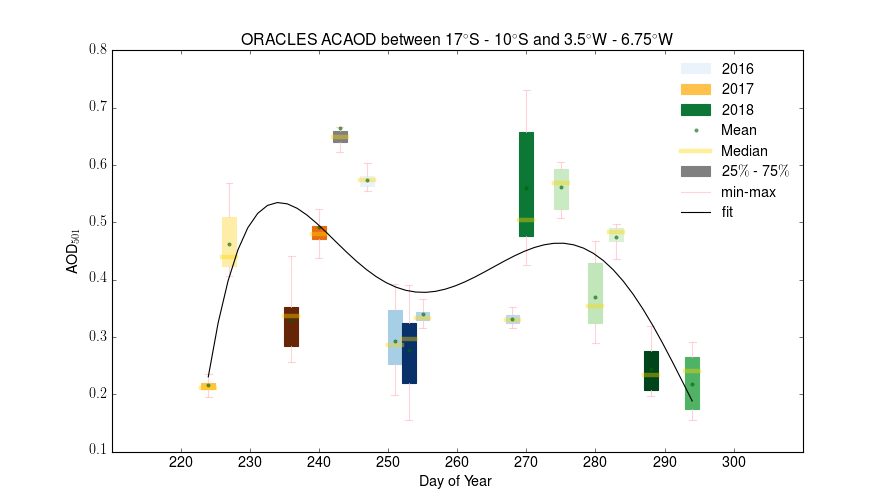

In [348]:
plt.figure()
bp = plt.boxplot(bin_aod6,positions=bin_doy6,vert=True,
                showfliers=False,widths=2,showmeans=True,patch_artist=True)
bl = plt.cm.Blues
set_box_whisker_color(bl,bp,np.array(bin_num6))

bp7 = plt.boxplot(np.array(bin_aod7),positions=np.array(bin_doy7),vert=True,
                showfliers=False,widths=2,showmeans=True,patch_artist=True)
gr = plt.cm.YlOrBr
set_box_whisker_color(gr,bp7,np.array(bin_num7))

bp8 = plt.boxplot(np.array(bin_aod8),positions=np.array(bin_doy8),vert=True,
                showfliers=False,widths=2,showmeans=True,patch_artist=True)
by = plt.cm.Greens
set_box_whisker_color(by,bp8,np.array(bin_num8))

xy6 = [[r.get_data()[0],r.get_data()[1]] for r in bp['means']]
xy6 = np.array(xy6)[:,:,0]
xy7 = [[r.get_data()[0],r.get_data()[1]] for r in bp7['means']]
xy7 = np.array(xy7)[:,:,0]
xy8 = [[r.get_data()[0],r.get_data()[1]] for r in bp8['means']]
xy8 = np.array(xy8)[:,:,0]
xx = np.append(np.append(xy7[:,0],xy6[:,0]),xy8[:,0])
yy = np.append(np.append(xy7[:,1],xy6[:,1]),xy8[:,1])
xn = np.linspace(xx.min(),xx.max(),50)
spl = UnivariateSpline(xx,yy, k=5)
lb = plt.plot(xn,spl(xn),'-k',label='fit')

plt.xlim(210,310)
plt.xticks([220,230,240,250,260,270,280,290,300])
plt.gca().set_xticklabels([220,230,240,250,260,270,280,290,300])

plt.ylabel('AOD_{{501}}')
plt.xlabel('Day of Year')
plt.title('ORACLES ACAOD between 17$^{{\circ}}$S - 10$^{{\circ}}$S and 3.5$^{{\circ}}$W - 6.75$^{{\circ}}$W')

#plt.grid()
bp['boxes'][0].set_color('grey')
plt.legend([bp['boxes'][1],bp7['boxes'][0],bp8['boxes'][0],bp['means'][0],bp['medians'][0],bp['boxes'][0],
            bp['whiskers'][0],lb[0]],
           ['2016','2017','2018','Mean','Median','25$\%$ - 75$\%$','min-max','fit'],frameon=False,numpoints=1)
plt.savefig(fp+'plot_all/ORACLESall_4STAR_AOD_monthly_hist.png',
            transparent=True,dpi=500)

<IPython.core.display.Javascript object>


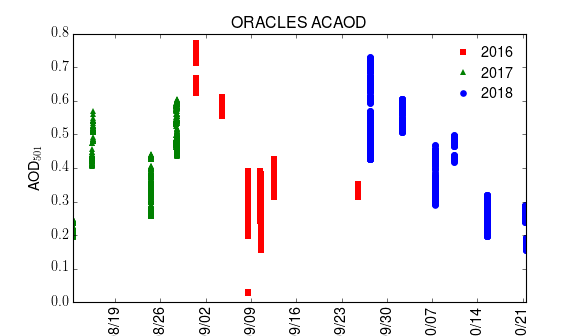

In [200]:
plt.figure()
plt.plot(ar6['ndtime2'][ar6['flq']],ar6['AOD0501'][ar6['flq']],'rs',label='2016',markeredgecolor='None')
plt.plot(ar7['ndtime2'][ar7['flq']],ar7['AOD0501'][ar7['flq']],'g^',label='2017',markeredgecolor='None')
plt.plot(ar8['ndtime2'][ar8['flq']],ar8['AOD0501'][ar8['flq']],'bo',label='2018',markeredgecolor='None')
plt.title('ORACLES ACAOD')
monthyearFmt = mdates.DateFormatter('%B')
monthyearFmt2 = mdates.DateFormatter('%m/%d')
plt.gca().xaxis.set_major_formatter(monthyearFmt2)
#plt.gca().xaxis.set_minor_formatter(monthyearFmt2)
plt.xticks(rotation=90)
ax.set_xlim([datetime(2018, 7, 30), datetime(2018, 10, 30)])
plt.legend(frameon=False,numpoints=1,handletextpad=0.2)
plt.ylabel('AOD_{{501}}')
plt.savefig(fp+'plot_all/ORACLESall_4STAR_AOD_monthly.png',
            transparent=True,dpi=500)

## Add a map of the region

In [276]:
from mpl_toolkits.basemap import Basemap

In [289]:
def mapfig(ax=plt.gca()):
    m = Basemap(projection='merc',llcrnrlat=-25,urcrnrlat=8,llcrnrlon=-15,urcrnrlon=18,resolution='l',ax=ax)
    m.drawcoastlines()
    #m.drawmeridians(np.linspace(-17,11,8),labels=[0,0,0,1],linewidth=0.1)
    #m.drawparallels(np.linspace(-18,4,12),labels=[1,0,0,0],linewidth=0.1)
    m.drawlsmask(land_color='lightgrey',ocean_color='None',lakes=True)
    #m.shadedrelief(alpha=0.4)
    return m

<IPython.core.display.Javascript object>


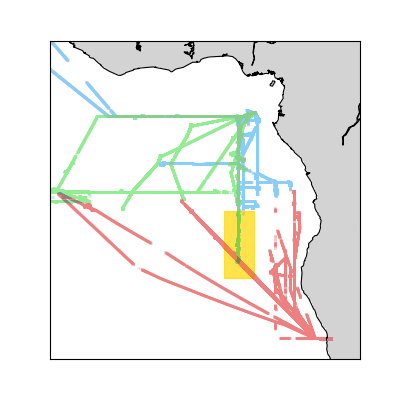

In [303]:
fig,ax = plt.subplots(1,1,figsize=(5,5))
ax1 = ax
#ax1 = plt.subplot(1,2,1)
m = mapfig(ax=ax1)
x6,y6 = m(ar6['Longitude'],ar6['Latitude'])
m.plot(x6,y6,'.',color='lightcoral',alpha=0.002,markeredgecolor='None')

x7,y7 = m(ar7['Longitude'],ar7['Latitude'])
m.plot(x7,y7,'.',color='lightgreen',alpha=0.002,markeredgecolor='None')

x8,y8 = m(ar8['Longitude'],ar8['Latitude'])
m.plot(x8,y8,'.',color='lightskyblue',alpha=0.002,markeredgecolor='None')

xss,yss = m([lon1,lon1,lon2,lon2,lon1],[lat1,lat2,lat2,lat1,lat1])
xss2,yss2 = m([lon1,lon1,lon2,lon2,lon1],[lat1,lat1,lat1,lat1,lat1])

plt.fill_between(xss, yss, yss2,color='gold',alpha=0.7)
#plt.Polygon(xss,yss,edgecolor='None',color='gold',alpha=0.3)

<IPython.core.display.Javascript object>


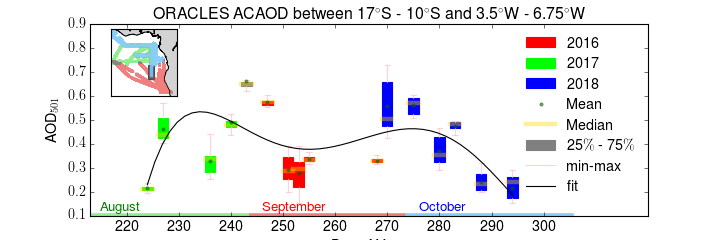

In [382]:
plt.figure(figsize=(9,3))
bp = plt.boxplot(bin_aod6,positions=bin_doy6,vert=True,
                showfliers=False,widths=2,showmeans=True,patch_artist=True)
bl = plt.cm.bwr
set_box_whisker_color(bl,bp,np.array(bin_num6)*0.0+3130)

bp7 = plt.boxplot(np.array(bin_aod7),positions=np.array(bin_doy7),vert=True,
                showfliers=False,widths=2,showmeans=True,patch_artist=True)
gr = plt.cm.brg
set_box_whisker_color(gr,bp7,np.array(bin_num7)*0.0+870)

bp8 = plt.boxplot(np.array(bin_aod8),positions=np.array(bin_doy8),vert=True,
                showfliers=False,widths=2,showmeans=True,patch_artist=True)
by = plt.cm.bwr_r
set_box_whisker_color(by,bp8,np.array(bin_num8)*0.0+760)

xy6 = [[r.get_data()[0],r.get_data()[1]] for r in bp['means']]
xy6 = np.array(xy6)[:,:,0]
xy7 = [[r.get_data()[0],r.get_data()[1]] for r in bp7['means']]
xy7 = np.array(xy7)[:,:,0]
xy8 = [[r.get_data()[0],r.get_data()[1]] for r in bp8['means']]
xy8 = np.array(xy8)[:,:,0]
xx = np.append(np.append(xy7[:,0],xy6[:,0]),xy8[:,0])
yy = np.append(np.append(xy7[:,1],xy6[:,1]),xy8[:,1])
xn = np.linspace(xx.min(),xx.max(),50)
spl = UnivariateSpline(xx,yy, k=5)
lb = plt.plot(xn,spl(xn),'-k',label='fit')

plt.xlim(213,320)
plt.ylim(0.1,0.9)
plt.xticks([220,230,240,250,260,270,280,290,300])
plt.gca().set_xticklabels([220,230,240,250,260,270,280,290,300])

plt.plot([213,243],[0.1,0.1],'-',color='lightgreen',lw=6)
plt.plot([244,273],[0.1,0.1],'-',color='lightcoral',lw=6)
plt.plot([274,305],[0.1,0.1],'-',color='lightskyblue',lw=6)
plt.text(215,0.12,'August',color='g')
plt.text(246,0.12,'September',color='r')
plt.text(276,0.12,'October',color='b')

plt.ylabel('AOD_{{501}}')
plt.xlabel('Day of Year')
plt.title('ORACLES ACAOD between 17$^{{\circ}}$S - 10$^{{\circ}}$S and 3.5$^{{\circ}}$W - 6.75$^{{\circ}}$W')

#plt.grid()
bp['boxes'][0].set_color('grey')
plt.legend([bp['boxes'][1],bp7['boxes'][0],bp8['boxes'][0],bp['means'][0],bp['medians'][0],bp['boxes'][0],
            bp['whiskers'][0],lb[0]],
           ['2016','2017','2018','Mean','Median','25$\%$ - 75$\%$','min-max','fit'],frameon=False,numpoints=1)

axb = plt.gcf().add_axes([0.06, 0.6, 0.28, 0.28])
m = mapfig(ax=axb)
x6,y6 = m(ar6['Longitude'],ar6['Latitude'])
m.plot(x6,y6,'.',color='lightcoral',alpha=0.006,markeredgecolor='None')

x7,y7 = m(ar7['Longitude'],ar7['Latitude'])
m.plot(x7,y7,'.',color='lightgreen',alpha=0.006,markeredgecolor='None')

x8,y8 = m(ar8['Longitude'],ar8['Latitude'])
m.plot(x8,y8,'.',color='lightskyblue',alpha=0.05,markeredgecolor='None')

xss,yss = m([lon1,lon1,lon2,lon2,lon1],[lat1,lat2,lat2,lat1,lat1])
xss2,yss2 = m([lon1,lon1,lon2,lon2,lon1],[lat1,lat1,lat1,lat1,lat1])

plt.fill_between(xss, yss, yss2,color='k',alpha=0.6)

plt.savefig(fp+'plot_all/ORACLESall_4STAR_AOD_monthly_hist_map.png',
            transparent=True,dpi=500)

# Plot wavelength AOD spectra

In [315]:
kar6 = ar6.keys()
kar6.sort()

In [327]:
nn = [i for i in kar6  if i[0]=='A']

In [330]:
nn[0:24]

[u'AOD0355',
 u'AOD0380',
 u'AOD0452',
 u'AOD0470',
 u'AOD0501',
 u'AOD0520',
 u'AOD0530',
 u'AOD0532',
 u'AOD0550',
 u'AOD0606',
 u'AOD0620',
 u'AOD0660',
 u'AOD0675',
 u'AOD0700',
 u'AOD0781',
 u'AOD0865',
 u'AOD1020',
 u'AOD1040',
 u'AOD1064',
 u'AOD1236',
 u'AOD1250',
 u'AOD1559',
 u'AOD1627',
 u'AOD1650']

In [398]:
nn.pop(13)

u'AOD0700'

In [400]:
ar6['aods'] = np.array([ar6[i] for i in nn[0:23]]).T
ar7['aods'] = np.array([ar7[i] for i in nn[0:23]]).T
ar8['aods'] = np.array([ar8[i] for i in nn[0:23]]).T

In [401]:
ar6['meanaod'] = np.nanmean(ar6['aods'][ar6['flac'],:],axis=0)
ar6['medianaod'] = np.nanmedian(ar6['aods'][ar6['flac'],:],axis=0)
ar6['stdaod'] = np.nanstd(ar6['aods'][ar6['flac'],:],axis=0)

In [402]:
ar7['meanaod'] = np.nanmean(ar7['aods'][ar7['flac'],:],axis=0)
ar7['medianaod'] = np.nanmedian(ar7['aods'][ar7['flac'],:],axis=0)
ar7['stdaod'] = np.nanstd(ar7['aods'][ar7['flac'],:],axis=0)

In [403]:
ar8['meanaod'] = np.nanmean(ar8['aods'][ar8['flac'],:],axis=0)
ar8['medianaod'] = np.nanmedian(ar8['aods'][ar8['flac'],:],axis=0)
ar8['stdaod'] = np.nanstd(ar8['aods'][ar8['flac'],:],axis=0)

In [396]:
ar6['meanAE'] = np.nanmean(ar6['AOD_angstrom_470_865'][ar6['flac']])
ar7['meanAE'] = np.nanmean(ar7['AOD_angstrom_470_865'][ar7['flac']])
ar8['meanAE'] = np.nanmean(ar8['AOD_angstrom_470_865'][ar8['flac']])
ar6['stdAE'] = np.nanstd(ar6['AOD_angstrom_470_865'][ar6['flac']])
ar7['stdAE'] = np.nanstd(ar7['AOD_angstrom_470_865'][ar7['flac']])
ar8['stdAE'] = np.nanstd(ar8['AOD_angstrom_470_865'][ar8['flac']])

In [404]:
wvls = [355.0,380.0,452.0,470.0,501.0,520.0,530.0,532.0,550.0,606.0,620.0,660.0,675.0,
        781.0,865.0,1020.0,1040.0,1064.0,1236.0,1250.0,1559.0,1627.0,1650.0,]

<IPython.core.display.Javascript object>


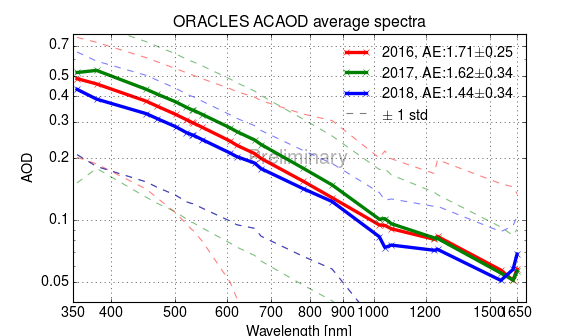

In [405]:
plt.figure()
plt.plot(wvls,ar6['meanaod'],'-xr',label='2016, AE:{:1.2f}$\pm${:1.2f}'.format(ar6['meanAE'],ar6['stdAE']),lw=3)
plt.plot(wvls,ar7['meanaod'],'-xg',label='2017, AE:{:1.2f}$\pm${:1.2f}'.format(ar7['meanAE'],ar7['stdAE']),lw=3)
plt.plot(wvls,ar8['meanaod'],'-xb',label='2018, AE:{:1.2f}$\pm${:1.2f}'.format(ar8['meanAE'],ar8['stdAE']),lw=3)

plt.plot(wvls,ar6['meanaod']+ar6['stdaod'],'--r',alpha=0.5)
plt.plot(wvls,ar7['meanaod']+ar7['stdaod'],'--g',alpha=0.5)
plt.plot(wvls,ar8['meanaod']+ar8['stdaod'],'--b',alpha=0.5)

plt.plot(wvls,ar8['meanaod']-ar8['stdaod'],'--k',alpha=0.5,label='$\pm$ 1 std')

plt.plot(wvls,ar6['meanaod']-ar6['stdaod'],'--r',alpha=0.5)
plt.plot(wvls,ar7['meanaod']-ar7['stdaod'],'--g',alpha=0.5)
plt.plot(wvls,ar8['meanaod']-ar8['stdaod'],'--b',alpha=0.5)

plt.xlabel('Wavelength [nm]')
plt.ylabel('AOD')
plt.legend(frameon=False)
plt.gca().set_xscale('log')
plt.gca().set_yscale('log')
plt.grid()
plt.xticks([350,400,500,600,700,800,900,1000,1200,1500,1650])
plt.gca().set_xticklabels([350,400,500,600,700,800,900,1000,1200,1500,1650])
plt.yticks([0.05,0.1,0.2,0.3,0.4,0.5,0.7])
plt.gca().set_yticklabels([0.05,0.1,0.2,0.3,0.4,0.5,0.7])
plt.xlim(350,1700)
plt.ylim(0.04,0.8)
prelim()
plt.title('ORACLES ACAOD average spectra')
plt.savefig(fp+'plot_all/ORACLESall_4STAR_AOD_spectra.png',
            transparent=True,dpi=500)